In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt

In [2]:
df=pd.read_csv ('Data/Творожные десерты.csv')
df

,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,q13,q14,q15,q16,q17,q18
0,2,1,3,5,3,3,5,2,2,1,3,3,3,3,5,1,3,2
1,2,4,3,3,4,3,4,3,4,5,4,3,3,2,5,1,3,1
2,4,2,5,3,5,2,4,2,3,3,6,3,2,2,5,1,2,1
3,2,3,3,1,4,2,5,1,4,4,4,4,2,2,6,1,2,3
4,2,2,3,2,3,3,5,3,2,3,3,4,3,2,6,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,5,2,5,3,2,2,4,5,2,2,2,3,4,3,4,0,2,3
171,5,1,6,4,2,1,5,4,2,2,3,4,2,2,6,0,4,3
172,5,1,6,3,2,2,5,5,2,2,2,4,4,3,6,0,4,3
173,4,1,4,4,2,2,5,5,1,1,3,4,3,3,6,0,2,3


q1	Отсутствие консерванов и красителей	1 - вообще не важно, 6 - очень важно

q2	Дизайн упаковки	1 - вообще не важно, 6 - очень важно

q3	Натуральные ингредиенты	1 - вообще не важно, 6 - очень важно

q4	Фирма производитель	1 - вообще не важно, 6 - очень важно

q5	Цена	1 - вообще не важно, 6 - очень важно

q6	Условия хранения	1 - вообще не важно, 6 - очень важно

q7	Вкусовые качества	1 - вообще не важно, 6 - очень важно

q8	Срок годности	1 - вообще не важно, 6 - очень важно

q9	Внешний вид продукта	1 - вообще не важно, 6 - очень важно

q10	Формат упаковки	1 - вообще не важно, 6 - очень важно

q11	Наличие акций	1 - вообще не важно, 6 - очень важно

q12	Ркомендации друзей/знакомых	1 - вообще не важно, 6 - очень важно

q13	Хорошая реклама	1 - вообще не важно, 6 - очень важно

q14	Наличие в магазине	1 - вообще не важно, 6 - очень важно

q15	Ассортиментный ряд	1 - вообще не важно, 6 - очень важно

q16	Пол	0 - женщины, 1 - мужчины

q17	Возраст	1 - до 20 лет, 2 - 20-30 лет, 3 - 30-40 лет, 4 - старше 40 лет

q18	Доход	1 - меньше 400 USD, 2 - 400-1000 USD, 3 - больше 1000 USD

In [3]:
# Зададим переменную с массивом независимых переменных, по которым будет осуществляться кластеризация
X = df.drop(['q16', 'q17', 'q18'], axis=1)
print(X)

     q1  q2  q3  q4  q5  q6  q7  q8  q9  q10  q11  q12  q13  q14  q15
0     2   1   3   5   3   3   5   2   2    1    3    3    3    3    5
1     2   4   3   3   4   3   4   3   4    5    4    3    3    2    5
2     4   2   5   3   5   2   4   2   3    3    6    3    2    2    5
3     2   3   3   1   4   2   5   1   4    4    4    4    2    2    6
4     2   2   3   2   3   3   5   3   2    3    3    4    3    2    6
..   ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ...  ...  ...  ...  ...
170   5   2   5   3   2   2   4   5   2    2    2    3    4    3    4
171   5   1   6   4   2   1   5   4   2    2    3    4    2    2    6
172   5   1   6   3   2   2   5   5   2    2    2    4    4    3    6
173   4   1   4   4   2   2   5   5   1    1    3    4    3    3    6
174   4   1   5   2   2   1   5   5   2    1    3    4    4    2    6

[175 rows x 15 columns]


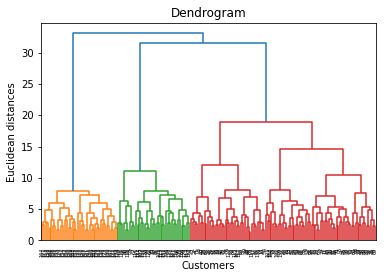

In [4]:
# Иерархическая кластеризация. Построение дендрограммы
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [5]:
# Кластеризация методом K-means
from sklearn.cluster import KMeans
clusterNum = 3
k_means = KMeans(init='k-means++', n_clusters=clusterNum,n_init=12)
k_means.fit(X)
labels=k_means.labels_
print(labels)

[2 2 2 2 2 2 2 0 2 2 2 2 2 2 0 2 2 2 2 2 2 0 2 2 0 2 2 1 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 1 1 2 2 2 2 1 2 2 2 2 0 2 2 2 2 2 2
 2 2 1 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 2 0 0 0 0 0 0 0 2 0 2 0 0 0 1 0 0 0 0
 0 1 0 0 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [6]:
# Добавление в исходный набор данных полученной переменной, которая указывает принадлежность к кластеру
df['Clus']=labels # добавится колонка с отнесением покупателей на кластеры
df

,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,q13,q14,q15,q16,q17,q18,Clus
0,2,1,3,5,3,3,5,2,2,1,3,3,3,3,5,1,3,2,2
1,2,4,3,3,4,3,4,3,4,5,4,3,3,2,5,1,3,1,2
2,4,2,5,3,5,2,4,2,3,3,6,3,2,2,5,1,2,1,2
3,2,3,3,1,4,2,5,1,4,4,4,4,2,2,6,1,2,3,2
4,2,2,3,2,3,3,5,3,2,3,3,4,3,2,6,1,3,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,5,2,5,3,2,2,4,5,2,2,2,3,4,3,4,0,2,3,1
171,5,1,6,4,2,1,5,4,2,2,3,4,2,2,6,0,4,3,1
172,5,1,6,3,2,2,5,5,2,2,2,4,4,3,6,0,4,3,1
173,4,1,4,4,2,2,5,5,1,1,3,4,3,3,6,0,2,3,1


In [7]:
# Число покупателей в каждом кластере
df['Clus'].value_counts()

2    82
1    48
0    45
Name: Clus, dtype: int64

In [9]:
# Кластеризация методом иерархической кластеризации (методом Уорда)
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
clus_2 = hc.fit_predict(X)

In [10]:
print(clus_2)

[0 0 0 0 0 0 0 2 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 0 2 2 2 2 2 2 2 0 2 0 2 0 0 1 2 2 2 2
 0 0 2 2 0 2 0 2 2 0 2 2 2 2 2 2 2 2 2 1 2 1 0 2 2 2 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [11]:
# Добавление в исходный набор данных полученной переменной, которая указывает принадлежность к кластеру
df['Clus_2']=labels # добавится колонка с отнесением покупателей на кластеры
df

,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,q13,q14,q15,q16,q17,q18,Clus,Clus_2
0,2,1,3,5,3,3,5,2,2,1,3,3,3,3,5,1,3,2,2,2
1,2,4,3,3,4,3,4,3,4,5,4,3,3,2,5,1,3,1,2,2
2,4,2,5,3,5,2,4,2,3,3,6,3,2,2,5,1,2,1,2,2
3,2,3,3,1,4,2,5,1,4,4,4,4,2,2,6,1,2,3,2,2
4,2,2,3,2,3,3,5,3,2,3,3,4,3,2,6,1,3,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,5,2,5,3,2,2,4,5,2,2,2,3,4,3,4,0,2,3,1,1
171,5,1,6,4,2,1,5,4,2,2,3,4,2,2,6,0,4,3,1,1
172,5,1,6,3,2,2,5,5,2,2,2,4,4,3,6,0,4,3,1,1
173,4,1,4,4,2,2,5,5,1,1,3,4,3,3,6,0,2,3,1,1


In [12]:
# Число покупателей в каждом кластере
df['Clus_2'].value_counts()

2    82
1    48
0    45
Name: Clus_2, dtype: int64

In [13]:
# таблица сопряженности между переменными "пол" и "номер кластера"
pd.crosstab(df['Clus'], df['q16'], margins=True)

q16,0,1,All
Clus,,,
0,40,5,45
1,42,6,48
2,5,77,82
All,87,88,175


In [14]:
# таблица сопряженности между переменными "возраст" и "номер кластера"
pd.crosstab(df['Clus'], df['q17'], margins=True)

q17,1,2,3,4,All
Clus,,,,,
0,20,21,2,2,45
1,3,13,21,11,48
2,11,32,26,13,82
All,34,66,49,26,175


In [15]:
# таблица сопряженности между переменными "личный доход" и "номер кластера"
pd.crosstab(df['Clus'], df['q18'], margins=True)

q18,1,2,3,All
Clus,,,,
0,27,17,1,45
1,2,17,29,48
2,25,46,11,82
All,54,80,41,175


### Вывод: 
Кластер 0 - женщины старше 30 лет с доходом свыше 1000 долларов

Кластер 1 - женщины моложе 30 лет с низкими и средним доходом

Кластер 2 - мужчины 20-40 лет с низким и средним доходом

In [16]:
# Сравнение средних оценок по каждой независимой переменной (q1-q15) для каждого кластера
df.groupby('Clus', axis=0).mean()

,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,q13,q14,q15,q16,q17,q18,Clus_2
Clus,,,,,,,,,,,,,,,,,,,
0,3.911111,3.933333,4.422222,2.800000,2.022222,2.422222,3.955556,1.844444,4.488889,4.444444,2.622222,3.600000,2.955556,3.600000,4.466667,0.111111,1.688889,1.422222,0
1,4.395833,1.500000,5.062500,3.000000,2.166667,1.666667,4.541667,3.895833,1.979167,1.958333,2.625000,3.541667,3.229167,2.604167,5.062500,0.125000,2.833333,2.562500,1
2,2.951220,2.426829,3.902439,3.146341,4.097561,2.024390,4.012195,1.987805,2.951220,2.963415,4.719512,3.548780,3.000000,2.975610,4.512195,0.939024,2.500000,1.829268,2


### Вывод: 
Кластер 0 - женщины старше 30 лет с доходом свыше 1000 долларов / что важно: q1, q3, q7, q8, q15 отсутствие красителей, натуральные инградиенты, вкус, срок годности, широта ассортимента

Кластер 1 - женщины моложе 30 лет с низкими и средним доходом / q2, q9, q10, q14 дизайн упаковки, внешний вид продукта, формат упаковки, наличие в магазине

Кластер 2 - мужчины 20-40 лет с низким и средним доходом / q5, q11, цена, наличие акций